In this notebook we are going to explore some different neural network architectures, to train an image classifier

We will first read our data into a pandas dataframe

In [189]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [180]:
data = pd.read_csv(r'C:\Users\diddy\projects\mnist_classifier\data\mnist\mnist.csv')


In [181]:
print(data.head())
print(data.shape)

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
(60000, 785)


In [182]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape




In [183]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

So, our data contains a matrix labelled data of handwritten digits and a greyscale pixel value for each of the pixels in the 28x28 grid. 

so, now we want to code the forward propogation part of our neural network. we will initilaize all of the weights and biases used in the network

In [184]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2





In [185]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("First 10 Y_train values:", Y_train[:10])


X_train shape: (784, 59000)
Y_train shape: (59000,)
First 10 Y_train values: [4 0 6 6 3 8 6 0 8 2]


In [186]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 6 8 ... 6 6 6] [4 0 6 ... 3 6 2]
0.12686440677966102
Iteration:  10
[2 4 3 ... 3 3 5] [4 0 6 ... 3 6 2]
0.1716271186440678
Iteration:  20
[0 4 3 ... 3 3 4] [4 0 6 ... 3 6 2]
0.26920338983050845
Iteration:  30
[0 0 3 ... 3 3 4] [4 0 6 ... 3 6 2]
0.34376271186440677
Iteration:  40
[0 0 3 ... 3 3 4] [4 0 6 ... 3 6 2]
0.397271186440678
Iteration:  50
[4 0 1 ... 3 6 8] [4 0 6 ... 3 6 2]
0.4441864406779661
Iteration:  60
[4 0 1 ... 3 6 8] [4 0 6 ... 3 6 2]
0.4820847457627119
Iteration:  70
[4 0 1 ... 3 6 8] [4 0 6 ... 3 6 2]
0.5145762711864407
Iteration:  80
[4 0 1 ... 3 6 8] [4 0 6 ... 3 6 2]
0.5438135593220339
Iteration:  90
[4 0 3 ... 3 6 8] [4 0 6 ... 3 6 2]
0.5682542372881356
Iteration:  100
[4 0 3 ... 3 6 8] [4 0 6 ... 3 6 2]
0.5923728813559322
Iteration:  110
[4 0 6 ... 3 6 8] [4 0 6 ... 3 6 2]
0.6140508474576272
Iteration:  120
[4 0 6 ... 3 6 8] [4 0 6 ... 3 6 2]
0.6327627118644068
Iteration:  130
[4 0 6 ... 3 6 8] [4 0 6 ... 3 6 2]
0.6509661016949152
Iteration:  140

In [187]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


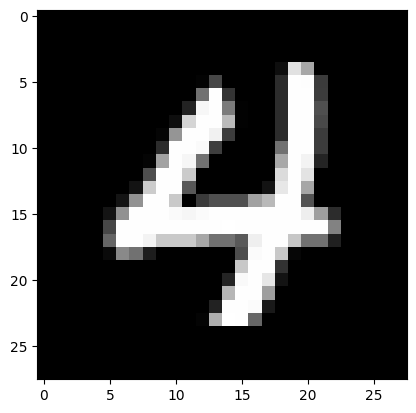

Prediction:  [0]
Label:  0


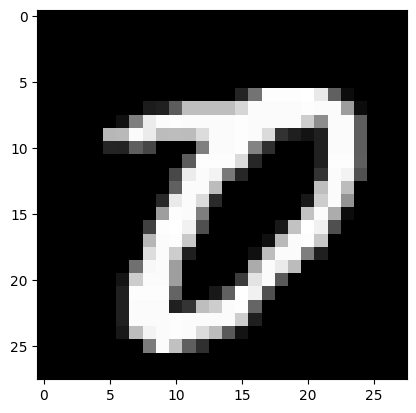

Prediction:  [6]
Label:  6


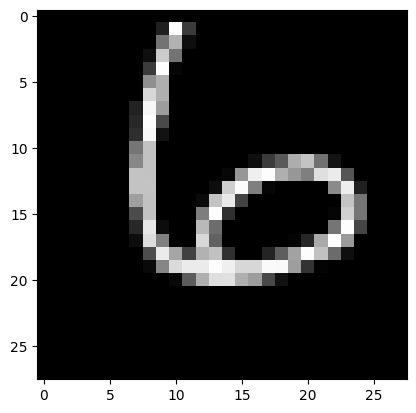

Prediction:  [0]
Label:  6


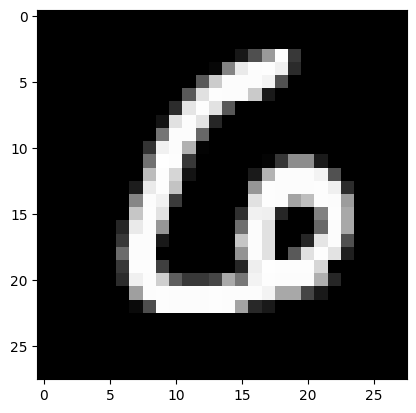

In [190]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [191]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 0 2 1 2 3 9 2 7 1 8 3 5 0 3 1 2 6 1 9 5 2 4 5 7 9 1 2 8 5 5 4 7 2 5 4 9
 6 7 3 1 7 4 7 2 2 1 2 2 8 1 2 7 3 1 5 1 7 9 9 0 5 6 2 7 5 8 0 9 2 9 8 5 4
 8 0 3 0 1 7 2 4 7 1 7 7 6 1 4 5 4 1 8 2 8 4 0 0 8 1 1 6 5 3 5 9 4 0 0 0 9
 6 4 5 3 8 7 6 6 1 2 5 4 4 1 3 8 2 9 8 3 1 6 7 7 6 5 6 5 4 3 1 3 2 4 8 3 3
 8 9 9 9 6 2 4 7 8 6 0 2 0 8 1 5 8 8 7 0 6 5 0 8 7 1 0 3 2 6 7 3 6 7 4 8 4
 9 3 5 0 2 8 2 8 6 7 1 5 9 4 4 1 8 1 2 0 7 7 7 7 2 2 3 0 6 8 4 4 2 1 7 3 9
 1 5 6 9 8 9 9 6 1 6 0 1 4 2 3 5 8 9 1 3 4 0 7 1 7 6 4 3 8 3 2 1 2 1 0 4 3
 8 7 5 9 7 1 7 1 5 5 2 8 7 1 3 9 0 8 4 1 2 9 8 3 4 2 5 7 1 2 7 2 1 3 6 4 2
 0 3 8 9 0 4 5 0 3 6 4 9 9 4 2 5 8 8 9 7 6 8 1 7 3 8 4 8 0 3 0 9 1 4 2 3 6
 9 8 7 1 9 7 6 4 3 6 2 6 2 6 5 1 8 0 0 6 0 9 5 5 5 0 8 1 4 3 9 3 7 2 1 1 9
 2 3 0 3 0 8 0 7 5 1 4 1 7 4 0 0 2 2 6 7 6 3 4 5 3 3 2 1 3 3 6 6 9 1 8 4 2
 2 8 9 2 9 8 4 1 8 3 1 5 5 6 9 7 4 7 5 6 2 9 3 7 9 5 4 1 4 3 2 6 8 7 3 9 4
 1 2 0 0 5 3 8 1 0 4 9 2 8 2 1 4 7 3 2 2 1 2 2 1 3 4 2 1 6 3 4 1 1 2 3 4 8
 4 3 0 6 2 2 3 5 3 1 4 8 

np.float64(0.855)